Implementation of Gradient Descent Algorithm for A Single Feature Regression Problem
In this example, the input feature 'x' is the size of a house in thousands of square feet and the output feature 'y' is the price of the house in thousands of dollars.

y is found as:
y = wx+b
where w and b are the parameters to be found.
This exercise aims at finding the best values of w and b by minimizing the cost function (mean squared error cost function)


In [278]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [279]:
# create training data
# x is the input variable (size of house in 1000s of sq ft)
# y is the target variable (price of house in 1000s of dollars)
x_train = np.array([1.0,2.0,3,4,5,6,7,8,9,10])
y_train = np.array([300, 500,700,900,1100,1300,1500,1700,1900,2100])
training_data_size = x_train.shape[0]
print(f"Size of training data is {training_data_size}")

Size of training data is 10


Text(0.5, 0, 'Size of House (1000s of sq feet)')

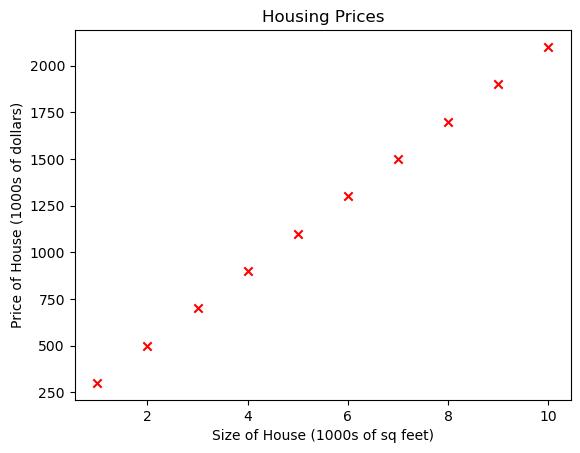

In [280]:
# Visualizing the data points:
plt.scatter(x_train, y_train, marker = 'x', c = 'r')
plt.title("Housing Prices")
plt.ylabel("Price of House (1000s of dollars)")
plt.xlabel("Size of House (1000s of sq feet)")

In [281]:
# Defining a function that calculates model predictions based on values of w and b:
def compute_model_predictions(w,b, training_data_size):
    model_predictions = np.zeros(training_data_size)
    for i in range(training_data_size):
        model_predictions[i] = w*x_train[i]+b
    return model_predictions

In [282]:
# Defining a function that calculates the mean squared error cost function
def compute_mean_squared_error(model_predictions, y_train,training_data_size):
  mse=0
  for i in range(training_data_size):
    mse += (model_predictions[i] - y_train[i])**2
  mse = mse/(2*training_data_size)
  return mse

In [283]:
# Picking initial values of w and b:
w = 100
b = 50
# Predicting model output for given w and b:
model_predictions = compute_model_predictions(w,b,training_data_size)

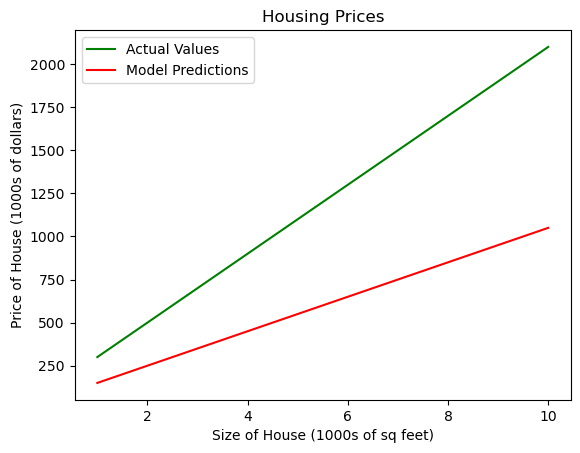

In [284]:
# Visualizing how far off our initial prediction is from actual value
plt.plot(x_train, y_train, label = 'Actual Values', color = 'g')
plt.plot(x_train, model_predictions, label ='Model Predictions', color='r')
plt.title("Housing Prices")
plt.ylabel("Price of House (1000s of dollars)")
plt.xlabel("Size of House (1000s of sq feet)")
plt.legend()

In [285]:


def gradient_descent(w,b,alpha,training_data_size,termination_condition='absolute_minimum', max_iter = 10000, min_mse = 1e-20, log_intervals = 100,update_step_gap=1e-12):
    '''
    Find values w,b which minimize the cost function using gradient descent
    Termination conditions:
        1) 'max_iter' : terminates the gradent descent when maximum number of iterations are reached
        2) 'min_mse' : terminates the GD when the MSE for model prediction matches the specified MSE
        3) 'absolute_minimum': terminates the GD only when the new value of w or b is equal to the current value of w or b
        4) 'update_step_gap' : minimum difference between current value of w or b and the next value of w or b
    '''
    
    flag = True
    iteration = 1
    
    while(flag):
        
        if termination_condition == 'max_iter' and iteration>max_iter:
            print("Reached maximum iterations")
            break
            
        model_predictions = compute_model_predictions(w,b, training_data_size)
        mse = compute_mean_squared_error(model_predictions, y_train,training_data_size)
        
        if termination_condition == 'min_mse' and mse<=min_mse:
            print("Reached minimum MSE")
            break
            
        w_delta = 0
        b_delta = 0
        for i in range(training_data_size):
            w_delta += (model_predictions[i] - y_train[i])*x_train[i]
            b_delta += (model_predictions[i] - y_train[i])
        w_delta = w_delta/training_data_size
        b_delta = b_delta/training_data_size
        w_temp = w - alpha * w_delta
        b_temp = b - alpha * b_delta
        w_gap = abs(w_temp - w)
        b_gap = abs(b_temp - b)
        
        if iteration%log_intervals==0:
            print(f"iter:{iteration}\t w:{w}\t w_gap:{w_gap}\t b:{b}\t b_gap:{b_gap}\t mse:{mse}")
       
        if w_temp == w or b_temp == b:
            print("Successfully reached a minimum")
            break
        
        if termination_condition == 'update_step_gap' and (abs(w_temp-w)<=update_step_gap or abs(b_temp-b)<=update_step_gap):
            print("Minimum gap between update step achieved")
            break
        
        w = w_temp
        b = b_temp
        iteration +=1

    return round(w,2), round(b,2), mse

In [286]:
w = 100
b = 50
alpha = 1e-2
# Find w and b by reaching minimum
w, b, mse = gradient_descent(w,b,alpha,training_data_size)

# Find w and b by maximum number of iterations
# w, b, mse = gradient_descent(w,b,alpha,training_data_size,termination_condition='max_iter', max_iter=20000)

# Find w and b by achieving minimum MSE
# w, b, mse = gradient_descent(w,b,alpha,training_data_size,termination_condition='min_mse',min_mse=1e-8)

# # Find w and b by achieving minimum gap between current w or b and next w or b
# w, b, mse = gradient_descent(w,b,alpha,training_data_size,termination_condition='update_step_gap',update_step_gap=1e-8)
print(f"Optimal values of w and b are :{w} and {b} respectively")


iter:100	 w:204.07306240353492	 w_gap:0.008552493034613917	 b:71.64406304861232	 b_gap:0.0595409373194542	 mse:86.15869512464167
iter:200	 w:203.30090746070638	 w_gap:0.006931145479427414	 b:77.01966860195382	 b_gap:0.04825340364160979	 mse:56.58791382960753
iter:300	 w:202.67513457556913	 w_gap:0.005617166534051421	 b:81.37618827163521	 b_gap:0.03910571562734333	 mse:37.166208087931636
iter:400	 w:202.16799322083207	 w_gap:0.004552286482066847	 b:84.90681629930423	 b_gap:0.031692209861191145	 mse:24.410283577421914
iter:500	 w:201.75699370360604	 w_gap:0.0036892821477181315	 b:87.76812193198916	 b_gap:0.025684126981772692	 mse:16.03235775143894
iter:600	 w:201.42390983737786	 w_gap:0.0029898827367560443	 b:90.08699264265981	 b_gap:0.020815032517617738	 mse:10.52984469659636
iter:700	 w:201.15397068345789	 w_gap:0.002423072679619054	 b:91.96626108269722	 b_gap:0.01686900158284743	 mse:6.9158654674160065
iter:800	 w:200.9352055188638	 w_gap:0.0019637162148740117	 b:93.48926529913294	 b_

MSE for w = 200.0 and b = 100.0 is 8.142559154818866e-22


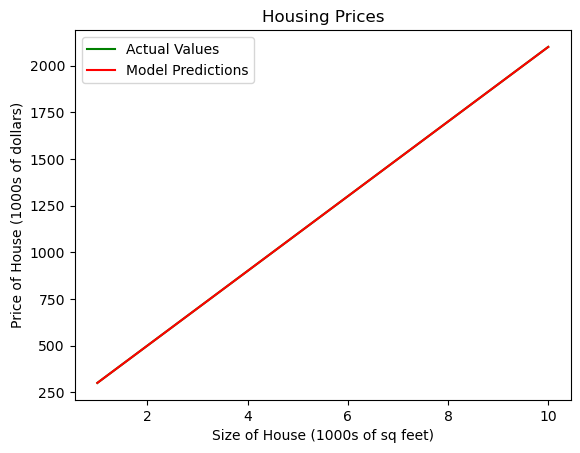

In [287]:
# Computing model predictions for optimal w and b values:
model_predictions = compute_model_predictions(w,b,training_data_size)
plt.plot(x_train, y_train, label = 'Actual Values', color = 'g')
plt.plot(x_train, model_predictions, label ='Model Predictions', color='r')
plt.title("Housing Prices")
plt.ylabel("Price of House (1000s of dollars)")
plt.xlabel("Size of House (1000s of sq feet)")
plt.legend()
print(f"MSE for w = {w} and b = {b} is {mse}")